**Klasifikasi Keluarga Felidae**

Nama Anggota Kelompok:
- Muhammad Rakha Maulana  (202351139)
- Rio Rizqy Setiawan      (202351123)
- Rio Syahfiar            (202351120)

---

Import Dataset

Source Dataset: https://www.kaggle.com/datasets/juliencalenge/felidae-tiger-lion-cheetah-leopard-puma/data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Colab Notebooks/dataset-felidae.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


Load & Preprocess Data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    "/content/Felidae",
    target_size=(224, 224),  # MobileNetV2 input size
    batch_size=16,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    "/content/Felidae",
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    shuffle=False  # 🔑 Ini penting agar evaluasi benar
)


Found 196 images belonging to 5 classes.
Found 47 images belonging to 5 classes.


Build a MobileNetV2 Model

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(5, activation='softmax')  # 5 classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,597 (9.24 MB)

 Trainable params: 164,613 (643.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Train the Model

In [ ]:
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.3494 - loss: 1.6175 - val_accuracy: 0.8085 - val_loss: 0.6035
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 637ms/step - accuracy: 0.7656 - loss: 0.6617 - val_accuracy: 0.8723 - val_loss: 0.3015
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 577ms/step - accuracy: 0.8958 - loss: 0.2937 - val_accuracy: 0.9362 - val_loss: 0.1886
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 690ms/step - accuracy: 0.8820 - loss: 0.2763 - val_accuracy: 0.9362 - val_loss: 0.2110
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 607ms/step - accuracy: 0.8896 - loss: 0.2296 - val_accuracy: 0.9362 - val_loss: 0.1866
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 582ms/step - accuracy: 0.9087 - loss: 0.2155 - val_accuracy: 0.8723 - val_loss: 0.2341
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 684ms/step - accuracy: 0.9345 - loss: 0.1443 - val_accuracy: 1.0000 - val_loss: 0.0716
Epoch 8/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 650ms/step - accuracy: 0.9638 - loss: 0.1418 - val_accuracy: 0.9

Evaluate and Test the Model

In [ ]:
loss, accuracy = model.evaluate(val_generator)
print(f"Validation accuracy: {accuracy:.2f}")
print(f"Validation loss: {loss:.2f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 698ms/step - accuracy: 0.9134 - loss: 0.1928
Validation accuracy: 0.94
Validation loss: 0.15


Classification Report + Confusion Matrix

3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step
              precision    recall  f1-score   support

     Cheetah       0.92      1.00      0.96        11
     Leopard       1.00      0.90      0.95        10
        Lion       1.00      1.00      1.00         9
        Puma       1.00      1.00      1.00         8
       Tiger       1.00      1.00      1.00         9

    accuracy                           0.98        47
   macro avg       0.98      0.98      0.98        47
weighted avg       0.98      0.98      0.98        47



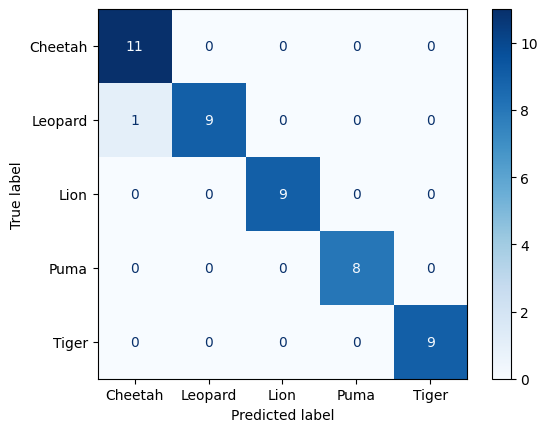

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

val_generator.reset()
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = val_generator.classes

labels = [label for label, idx in sorted(val_generator.class_indices.items(), key=lambda item: item[1])]

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')

print(classification_report(y_true, y_pred, target_names=labels))

Learning Curve

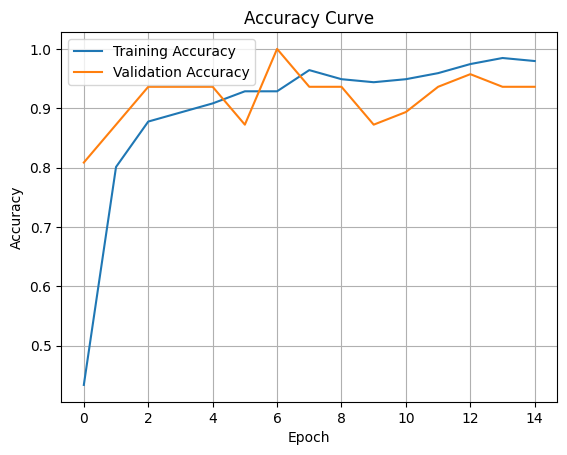

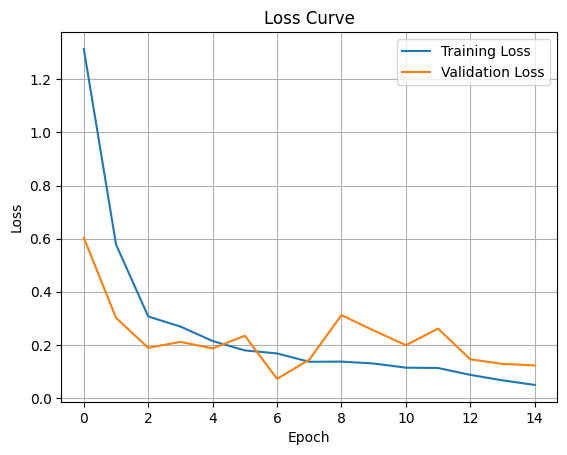

In [ ]:
import matplotlib.pyplot as plt

# Plot akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


---

Upload Custom Image

In [ ]:
from google.colab import files
uploaded = files.upload()

Preprocess Image

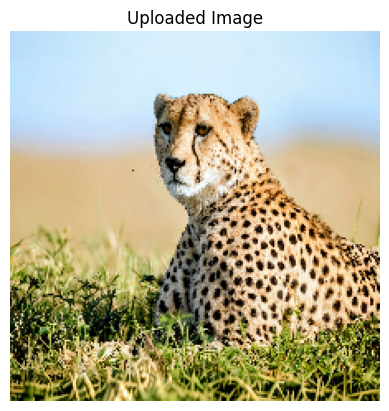

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import matplotlib.pyplot as plt

# Replace with the filename of your uploaded image
img_path = list(uploaded.keys())[0]

# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Show the image
plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Image")
plt.show()

Make Prediction and Display Results

In [ ]:
# Predict
pred = model.predict(img_array)
predicted_class = np.argmax(pred)

# Map class index to label
class_indices = train_generator.class_indices
labels = dict((v, k) for k, v in class_indices.items())

# Show result
print("Predicted class:", labels[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted class: Cheetah


## Start GUI

In [ ]:
!pip install -q gradio

import gradio as gr
from PIL import Image
import numpy as np
import tensorflow as tf

# Ambil nama kelas dari generator
# Pastikan Anda menjalankan ini setelah train_generator dibuat
class_names = list(train_generator.class_indices.keys())

# Fungsi prediksi
def predict_image(img):
    img = img.convert("RGB")
    img = img.resize((224, 224))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    preds = model.predict(img_array)[0]  # Output shape: (num_classes,)
    results = {class_names[i]: float(preds[i]) for i in range(len(class_names))}
    return results

# Buat interface Gradio
interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil"),
    outputs=gr.Label(num_top_classes=3),
    title="Klasifikasi Gambar Felidae",
    description="Unggah gambar dari keluarga kucing besar untuk mendapatkan prediksi model.",
)

interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://343caff546ed5ac40e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
